In [1]:
using Plots; pyplot()
using DiffEqCallbacks
using DifferentialEquations

┌ Info: Recompiling stale cache file /Users/miguelangel/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/miguelangel/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/miguelangel/.julia/compiled/v1.0/DiffEqCallbacks/TKs5l.ji for DiffEqCallbacks [459566f4-90b8-5000-8ac3-15dfb0a30def]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/miguelangel/.julia/compiled/v1.0/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1190


In [90]:
function f(du,u,p,t)
  du[1] = u[2]
  du[2] = -p.g
end

f (generic function with 1 method)

In [91]:
function g(du,u,p,t)
    du[1] = 0.
    du[2] = p.λ
end

g (generic function with 1 method)

In [92]:

function condition(u,t,integrator) # Event when event_f(u,t) == 0
  u[1]
end

condition (generic function with 1 method)

In [93]:
function affect!(integrator)
  integrator.u[2] = -integrator.u[2]
end

affect! (generic function with 1 method)

In [94]:
cb = ContinuousCallback(condition,affect!)

ContinuousCallback{typeof(condition),typeof(affect!),typeof(affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),Float64,Int64,Nothing}(condition, affect!, affect!, DiffEqBase.INITIALIZE_DEFAULT, nothing, true, 10, Bool[true, true], 2.220446049250313e-15, 0)

In [101]:
u0 = [3.0,0.0]
tspan = (0.0,15.0)
p = LVector(g = 1., λ = 0.1);
prob = ODEProblem(f,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 15.0)
u0: [3.0, 0.0]

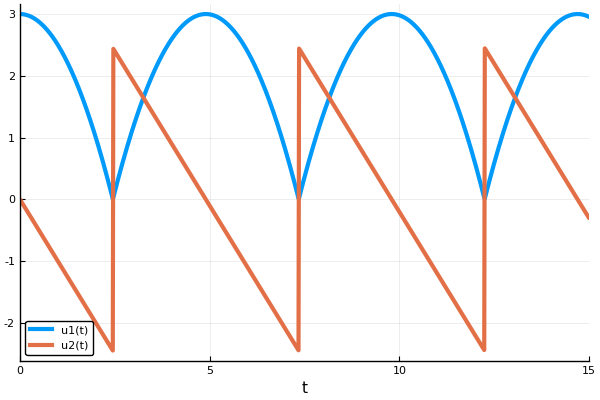

In [102]:
sol = solve(prob,Tsit5(),callback=cb)
plot(sol)

In [103]:
prob_SDE = SDEProblem(f,g,u0,tspan,p)

SDEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 15.0)
u0: [3.0, 0.0]

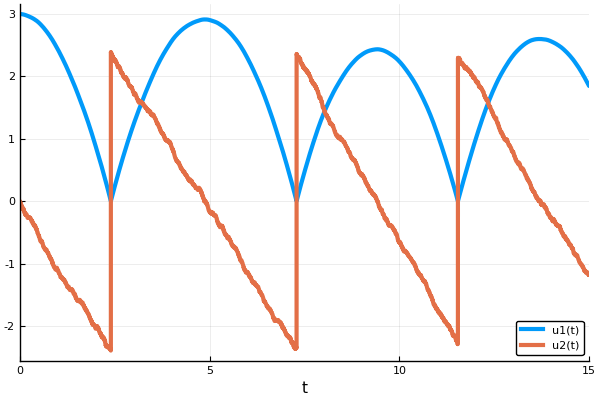

In [105]:
sol = solve(prob_SDE,callback=cb)
plot(sol)

In [69]:
En_Prob = EnsembleProblem(prob)

EnsembleProblem with problem SDEProblem

In [70]:
Ens_Sol = solve(En_Prob,trajectories = 100)

EnsembleSolution Solution of length 100 with uType:
RODESolution{Float64,2,Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},NoiseProcess{Float64,2,Float64,Array{Float64,1},Array{Float64,1},Array{Array{Float64,1},1},typeof(DiffEqNoiseProcess.INPLACE_WHITE_NOISE_DIST),typeof(DiffEqNoiseProcess.INPLACE_WHITE_NOISE_BRIDGE),true,DataStructures.Stack{Tuple{Float64,Array{Float64,1},Array{Float64,1}}},ResettableStacks.ResettableStack{Tuple{Float64,Array{Float64,1},Array{Float64,1}},true},RSWM{:RSwM3,Float64},RandomNumbers.Xorshifts.Xoroshiro128Plus},SDEProblem{Array{Float64,1},Tuple{Float64,Float64},true,Tuple{Float64,Float64},Nothing,SDEFunction{true,typeof(f),typeof(g),LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing},typeof(g),Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},Nothing},SOSRI,StochasticDiffEq.LinearInterpolationData{Array{Array{Float64,1},1},Array{Float64,1}},DiffEqBase.DEStats}

In [71]:
summ = MonteCarloSummary(Ens_Sol)

EnsembleSolution Solution of length 3029 with uType:
Float64